# Import Package

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sns.set(style="ticks", color_codes=True)

In [ ]:
from keras import Sequential, Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.layers.experimental.preprocessing import Rescaling, Normalization
from keras.regularizers import l2
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import load_model
from sklearn import metrics

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC

# Explore Data

In [ ]:
import os
import shutil
import pandas as pd
import numpy as np

In [ ]:
# shutil.unpack_archive('/content/drive/MyDrive/dphi_challanges/eye_gender_data.zip', '/content/drive/MyDrive/dphi_challanges/')

In [ ]:
Training_set = pd.read_csv('/content/drive/MyDrive/dphi_challanges/eye_gender_data/Training_set.csv')
Testing_set = pd.read_csv('/content/drive/MyDrive/dphi_challanges/eye_gender_data/Testing_set.csv')

In [ ]:
Training_set.head()

,filename,label
0,Image_1.jpg,male
1,Image_2.jpg,female
2,Image_3.jpg,female
3,Image_4.jpg,female
4,Image_5.jpg,male


In [ ]:
Training_set.sort_values('filename', inplace=True, ignore_index=True)

In [ ]:
Training_set.head()

,filename,label
0,Image_1.jpg,male
1,Image_10.jpg,male
2,Image_100.jpg,female
3,Image_1000.jpg,male
4,Image_1001.jpg,female


In [ ]:
Testing_set

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
2300,Image_2301.jpg
2301,Image_2302.jpg
2302,Image_2303.jpg
2303,Image_2304.jpg


In [ ]:
train_filename = os.listdir('/content/drive/MyDrive/dphi_challanges/eye_gender_data/train')

In [ ]:
len(os.listdir('/content/drive/MyDrive/dphi_challanges/eye_gender_data/train'))

9220

In [ ]:
len(os.listdir('/content/drive/MyDrive/dphi_challanges/eye_gender_data/test'))

2305

Data Train ada 9220

Data Test ada 2305

In [ ]:
2305/9220

0.25

# Import Grayscale Photos into Dataset

In [ ]:
import os
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
male = Training_set['filename'][Training_set['label']=='male']
male = list(male)

In [ ]:
female = Training_set['filename'][Training_set['label']=='female']
female = list(female)

In [ ]:
len(male)

5058

In [ ]:
len(female)

4162

In [ ]:
dataset_dir_male = '/content/drive/MyDrive/dphi_challanges/eye_gender_data/train'
dataset_dir_female = '/content/drive/MyDrive/dphi_challanges/eye_gender_data/train'
image_size=200

In [ ]:
from google.colab.patches import cv2_imshow

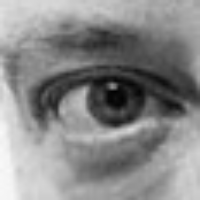

In [ ]:
image_path = os.path.join(dataset_dir_male,male[6])
image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,(image_size,image_size))
cv2_imshow(image)

In [ ]:
image.shape

(200, 200)

In [ ]:
def create_dataset_male(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir_male,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    return dataset

def create_dataset_female(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir_female,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    return dataset

In [ ]:
dataset = []
labels = []

In [ ]:
dataset = create_dataset_male(male,1)

100%|██████████| 5058/5058 [25:34<00:00,  3.30it/s]


In [ ]:
dataset = create_dataset_female(female,0)

100%|██████████| 4162/4162 [22:34<00:00,  3.07it/s]


In [ ]:
len(dataset)

9220

In [ ]:
dataset_dir_test = '/content/drive/MyDrive/dphi_challanges/eye_gender_data/test'
image_size=200
def create_dataset_test(image_category):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir_test,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset_test.append([np.array(image)])
    return dataset_test
dataset_test = []

In [ ]:
dataset_test = create_dataset_test(list(Testing_set['filename']))

100%|██████████| 2305/2305 [11:15<00:00,  3.41it/s]


# Splitting Data into X and y

In [ ]:
x = np.array([i[0] for i in dataset]).reshape(-1, 200, 200, 1)
y = np.array([i[1] for i in dataset])

In [ ]:
x.shape

(9220, 200, 200, 1)

#Model Training and Validating

In [ ]:
import keras

In [ ]:
model = Sequential()

model.add(keras.layers.InputLayer(input_shape=(100, 100, 3)))

model.add(Conv2D(64, kernel_size=5))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, strides=2))

model.add(Conv2D(32, kernel_size=5))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, strides=2))

model.add(Conv2D(16, kernel_size=5))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, strides=2))

# Flatten the output of the convolutional layer
model.add(Flatten())

model.add(Dense(288))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 96, 96, 64)        4864      
_________________________________________________________________
activation_4 (Activation)    (None, 96, 96, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 96, 96, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 32)        51232     
_________________________________________________________________
activation_5 (Activation)    (None, 44, 44, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 44, 44, 32)       

In [ ]:
adam = Adam(lr=0.001)

#Compile model
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('/content/drive/MyDrive/dphi_challanges/model/cnn_biasa12_100_4.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True)

random_state = 4

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=random_state, stratify=y)

print('Training ------------')

epochs = 200

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip=True)

it = datagen.flow(X_train, y_train)

history1 = model.fit_generator(it, steps_per_epoch=10, epochs=epochs, validation_data=(X_test, y_test), callbacks=[checkpoint])

Training ------------
Epoch 1/200
10/10 [==============================] - 3s 142ms/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.2139 - val_accuracy: 0.9367

Epoch 00001: val_accuracy improved from -inf to 0.93666, saving model to /content/drive/MyDrive/dphi_challanges/model/cnn_biasa12_100_5.hdf5
Epoch 2/200
10/10 [==============================] - 1s 78ms/step - loss: 0.0201 - accuracy: 0.9979 - val_loss: 0.2342 - val_accuracy: 0.9328

Epoch 00002: val_accuracy did not improve from 0.93666
Epoch 3/200
10/10 [==============================] - 1s 79ms/step - loss: 0.0281 - accuracy: 0.9918 - val_loss: 0.2745 - val_accuracy: 0.9206

Epoch 00003: val_accuracy did not improve from 0.93666
Epoch 4/200
10/10 [==============================] - 1s 79ms/step - loss: 0.0252 - accuracy: 0.9899 - val_loss: 0.2418 - val_accuracy: 0.9271

Epoch 00004: val_accuracy did not improve from 0.93666
Epoch 5/200
10/10 [==============================] - 1s 79ms/step - loss: 0.0127 - accuracy: 0.9973

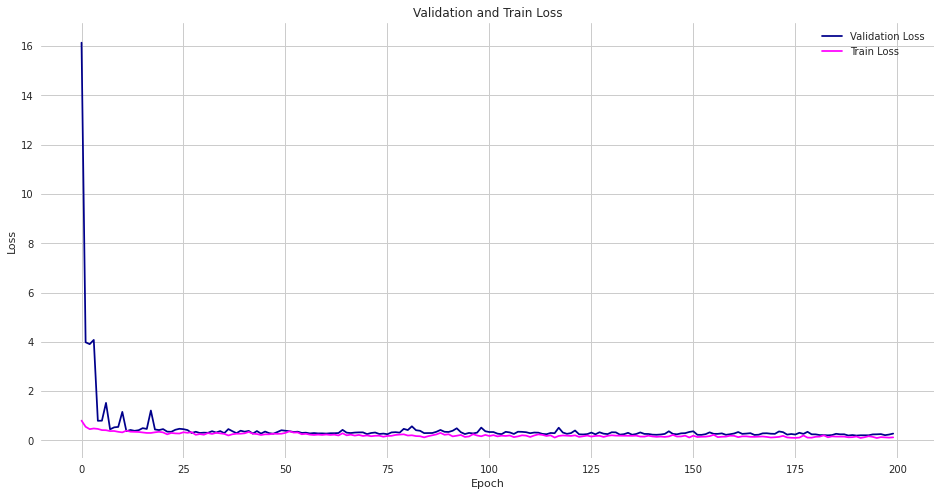

In [ ]:
plt.style.use('seaborn')
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(history1.history['val_loss'], color='darkblue')
plt.plot(history1.history['loss'], color='fuchsia')
plt.title('Validation and Train Loss')
plt.legend(['Validation Loss','Train Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


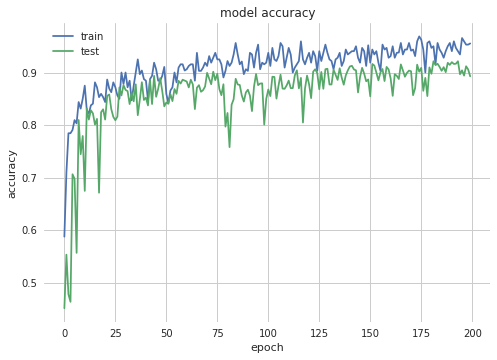

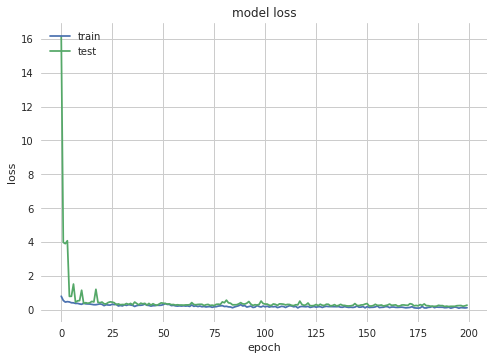

In [ ]:
# list all data in history
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model Predicition

In [ ]:
model1 = load_model('/content/drive/MyDrive/dphi_challanges/model/cnn_biasa12_100_4.hdf5')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 96, 96, 64)        4864      
_________________________________________________________________
activation_4 (Activation)    (None, 96, 96, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 96, 96, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 32)        51232     
_________________________________________________________________
activation_5 (Activation)    (None, 44, 44, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 44, 44, 32)       

In [ ]:
x_true_test = np.array([i[0] for i in dataset_test_100]).reshape(-1, 100, 100, 3)

In [ ]:
y_true_prob_pred = model1.predict_classes(x_true_test)

In [ ]:
y_true_pred = y_true_prob_pred
len(y_true_pred)

2305

In [ ]:
testing_set_label = pd.DataFrame(y_true_pred, columns=['label'])

for i in range(len(testing_set_label['label'])):
  if testing_set_label['label'][i] == 1:
    testing_set_label.loc[i] = 'male'
  else:
    testing_set_label.loc[i] = 'female'

testing_set_label

,label
0,male
1,male
2,male
3,male
4,male
...,...
2300,female
2301,female
2302,male
2303,male


In [ ]:
testing_set_label.to_csv('/content/drive/MyDrive/dphi_challanges/prediction9.csv',index=False)

In [ ]:
test2 = pd.read_csv('/content/drive/MyDrive/dphi_challanges/prediction9.csv')
test2.head()

,label
0,male
1,male
2,male
3,male
4,male
